# Config

In [1]:
!pip install -q geopandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import geopandas as gpd


In [3]:
# Configure global font settings
rcParams['text.color'] = '#4F4F4F'
rcParams['axes.labelcolor'] = '#4F4F4F'
rcParams['xtick.color'] = '#4F4F4F'
rcParams['ytick.color'] = '#4F4F4F'
rcParams['font.size'] = 14

# Lectura de datos

In [4]:
import sys
import os
current_dir = os.getcwd() # Obtener la ruta del directorio actual del notebook
ROOT_PATH = os.path.dirname(current_dir) # Obtener la ruta del directorio superior
sys.path.insert(1, ROOT_PATH) # Insertar la ruta en sys.path
import root

In [5]:
# Read datasets
train_consumption = pd.read_csv(root.DIR_DATA_RAW + 'train.csv')
# Read map
gdf = pd.read_pickle(root.DIR_DATA_ANALYTICS + 'Estonia Map.pkl')

In [6]:
int_to_county = {
                 10 : 'Saare',
                 15 : 'Võru',
                 7 : 'Pärnu',
                 13 : 'Valga',
                 14 : 'Viljandi',
                 11 : 'Tartu',
                 8 : 'Põlva',
                 4 : 'Jõgeva',
                 1 : 'Hiiu',
                 6 : 'Lääne',
                 9 : 'Rapla',
                 3 : 'Järva',
                 0 : 'Harju',
                 5 : 'Lääne-Viru',
                 2 : 'Ida-Viru'
                }

train_consumption.loc[:, 'county'] = train_consumption['county'].map(int_to_county)
len(train_consumption.county.unique())

/tmp/ipykernel_32438/2794212278.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Harju' 'Harju' 'Harju' ... 'Võru' 'Võru' 'Võru']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_consumption.loc[:, 'county'] = train_consumption['county'].map(int_to_county)


16

In [7]:
gdf_to_train = {
                'Harju maakond': 'Harju',
                'Hiiu maakond': 'Hiiu',
                'Ida-Viru maakond': 'Ida-Viru',
                'Järva maakond': 'Järva',
                'Jõgeva maakond': 'Jõgeva',
                'Lääne maakond': 'Lääne',
                'Lääne-Viru maakond': 'Lääne-Viru',
                'Pärnu maakond': 'Pärnu',
                'Põlva maakond': 'Põlva',
                'Rapla maakond': 'Rapla',
                'Saare maakond': 'Saare',
                'Tartu maakond': 'Tartu',
                'Valga maakond': 'Valga',
                'Viljandi maakond': 'Viljandi',
                'Võru maakond': 'Võru'
                }

gdf.loc[:, 'mk_nimi'] = gdf['mk_nimi'].map(gdf_to_train)
len(train_consumption.county.unique())

16

In [8]:
train_consumption = train_consumption[train_consumption['is_consumption'] == 0]

# Grafica x cliente

In [9]:
# Group
df = train_consumption.groupby(['is_business']).agg({'target': 'sum'}).reset_index()
# Sacar porcentaje
total_target_train = df['target'].sum()
df['target'] = (df['target'] / total_target_train) * 100

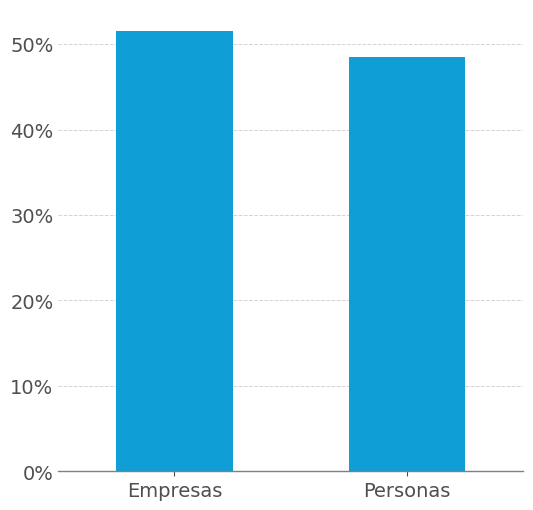

In [10]:
df['custom_labels'] = ['Empresas', 'Personas']

# Create the bar plot with vibrant custom color
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='custom_labels', y='target', data=df, color='#0F9ED5', saturation=1, width=0.5)

# Remove x and y labels
ax.set(xlabel=None, ylabel=None)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter())

# Remove top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Change the bottom spine color to gray
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(1)  # Optional: Adjust thickness of the bottom spine

# Remove y-axis ticks
ax.tick_params(axis='y', length=0)

# Enable horizontal gridlines and ensure they appear behind the bars
ax.set_axisbelow(True)  # Ensures gridlines are drawn below plot elements
ax.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)

# Show the plot
plt.show()

In [11]:
train_consumption = train_consumption[train_consumption['is_business'] == 1]

# Grafica x tipo de producto

In [12]:
# Group
df = train_consumption.groupby(['product_type']).agg({'target': 'sum'}).reset_index()
# Sacar porcentaje
total_target_train = df['target'].sum()
df['target'] = (df['target'] / total_target_train) * 100
df

,product_type,target
0,0,7.299070
1,1,14.627892
2,2,0.509259
3,3,77.563779


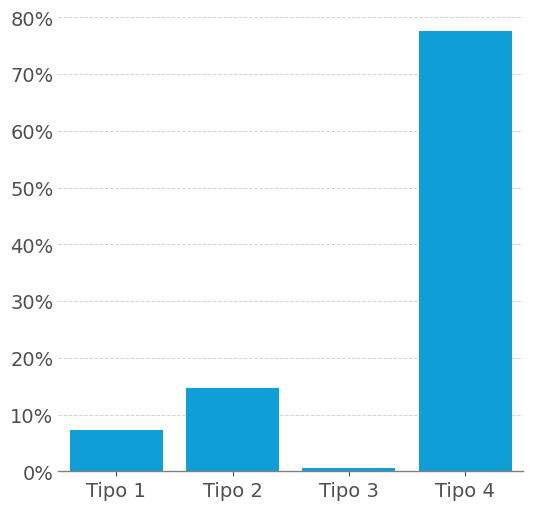

In [13]:
df['custom_labels'] = ['Tipo 1', 'Tipo 2', 'Tipo 3', 'Tipo 4']

# Create the bar plot with vibrant custom color
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='custom_labels', y='target', data=df, color='#0F9ED5', saturation=1)

# Remove x and y labels
ax.set(xlabel=None, ylabel=None)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter())

# Remove top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Change the bottom spine color to gray
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(1)  # Optional: Adjust thickness of the bottom spine

# Remove y-axis ticks
ax.tick_params(axis='y', length=0)

# Enable horizontal gridlines and ensure they appear behind the bars
ax.set_axisbelow(True)  # Ensures gridlines are drawn below plot elements
ax.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)

# Show the plot
plt.show()

In [14]:
train_consumption = train_consumption[train_consumption['product_type'] == 3]

# Grafica x county

In [15]:
# Group
df = train_consumption.groupby(['county']).agg({'target': 'sum'}).reset_index()
# Sacar porcentaje
total_target_train = df['target'].sum()
df['target'] = (df['target'] / total_target_train) * 100
df

,county,target
0,Harju,30.095760
1,Hiiu,1.125266
2,Ida-Viru,2.072754
3,Järva,5.503460
4,Jõgeva,3.398872
5,Lääne,0.451008
6,Lääne-Viru,8.577998
7,Pärnu,5.331913
8,Põlva,3.495493
9,Rapla,2.377320


In [16]:
df

,county,target
0,Harju,30.095760
1,Hiiu,1.125266
2,Ida-Viru,2.072754
3,Järva,5.503460
4,Jõgeva,3.398872
5,Lääne,0.451008
6,Lääne-Viru,8.577998
7,Pärnu,5.331913
8,Põlva,3.495493
9,Rapla,2.377320


In [17]:
gdf_c = gdf.merge(df, how='left', left_on='mk_nimi', right_on='county').reset_index()

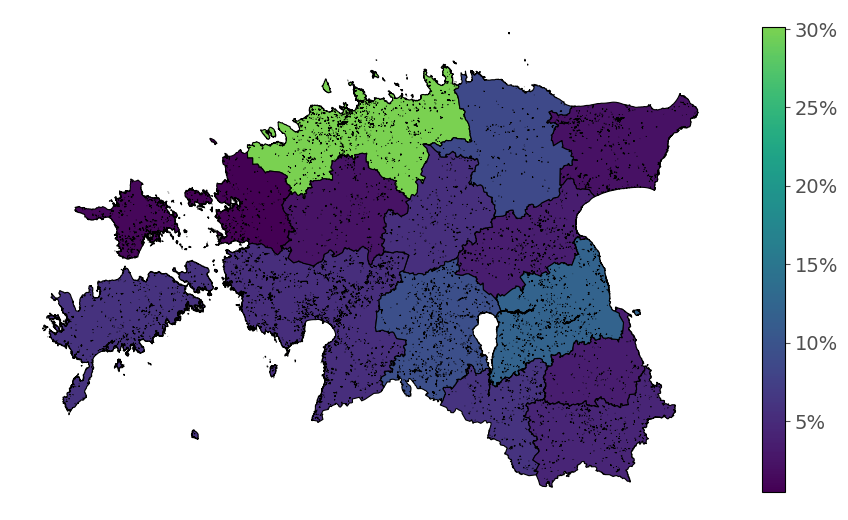

In [18]:
viridis_truncated = LinearSegmentedColormap.from_list('truncated', cm.viridis(np.linspace(0, 0.80, 256)))

fig, ax = plt.subplots(figsize=(10, 10))
map_plot = gdf_c.plot(
    column='target',
    cmap=viridis_truncated,  # Use custom colormap
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=False  # Disable automatic legend to customize
)

sm = plt.cm.ScalarMappable(cmap=viridis_truncated, norm=plt.Normalize(vmin=gdf_c['target'].min(), vmax=gdf_c['target'].max()))
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)  # Adjust size with 'fraction' and 'pad'
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.0f}%"))
ax.set_axis_off()
plt.show()


In [19]:
train_consumption = train_consumption[train_consumption['county'] == 'Harju']

# Temperatura promedio/h

In [20]:
train_consumption['datetime'] = pd.to_datetime(train_consumption['datetime'])
train_consumption['datetime'] = train_consumption['datetime'].dt.strftime('%Y-%m')
train_consumption = train_consumption[(train_consumption['datetime'] > '2021-12') & (train_consumption['datetime'] < '2023-01')]
train_consumption = train_consumption.groupby(['datetime']).agg({'target': 'mean'})
train_consumption

,target
datetime,
2022-01,10.380362
2022-02,86.185768
2022-03,620.284367
2022-04,1097.560893
2022-05,1278.623440
2022-06,1534.533579
2022-07,1451.386465
2022-08,1241.432328
2022-09,863.840157


In [21]:
train_consumption.to_excel('temperatura_promedio.xlsx')